In [ ]:
# Start the logger running in a background process. It will keep running until you tell it to stop.
# We will save the CPU and GPU utilisation stats to a CSV file every 0.2 seconds.
import subprocess
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
dt_string = now.strftime("%Y_%m_%d-%H_%M_%S")
logger_fname = dt_string+'_log.csv'
#logger_fname = 'log_compute.csv'

logger_pid = subprocess.Popen(
    ['python', 'log_gpu_cpu_stats.py',
     logger_fname,
     '--loop',  '0.2',  # Interval between measurements, in seconds (optional, default=1)
    ])
print('Started logging compute utilisation, saving to file: ' +  logger_fname)

Started logging compute utilisation, saving to file: 2024_11_19-17_33_19_log.csv


In [58]:
# End the background process logging the CPU and GPU utilisation.
logger_pid.terminate()
print('Terminated the compute utilisation logger background process')

Terminated the compute utilisation logger background process


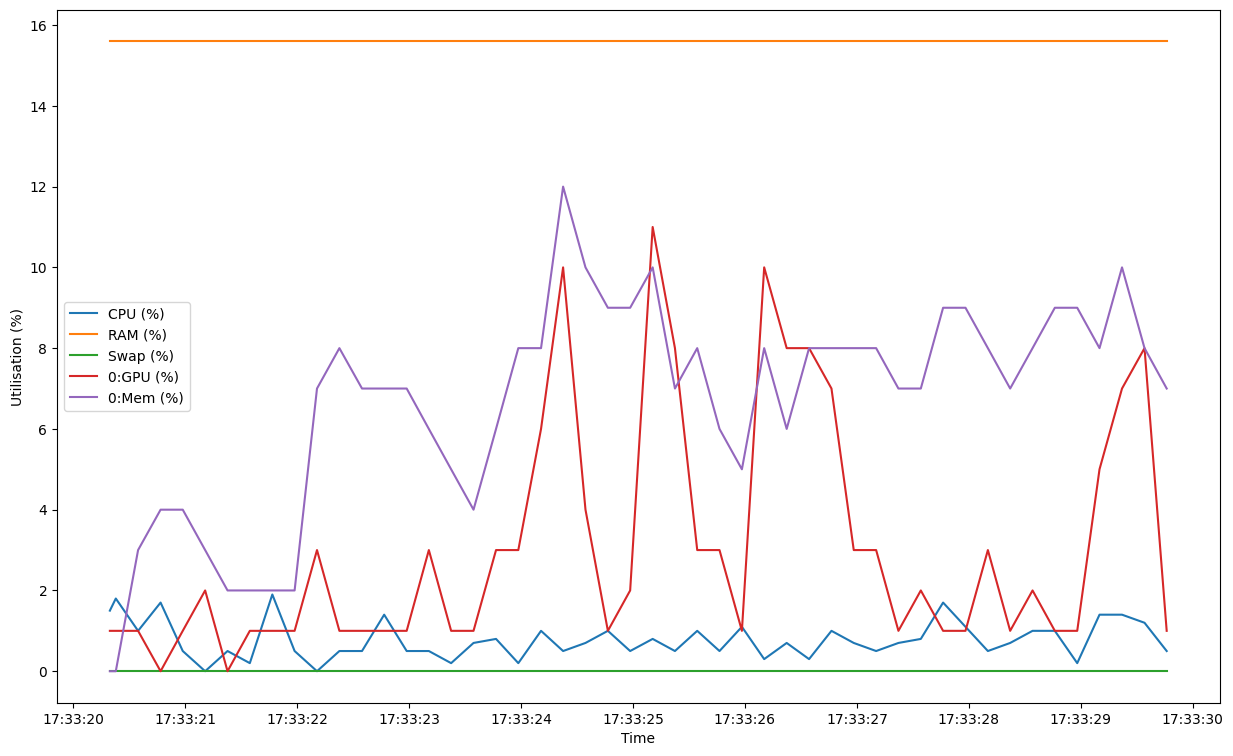

In [63]:
import pandas as pd
from matplotlib import pyplot as plt
from zoneinfo import ZoneInfo

#import the data from the csv
logger_df = pd.read_csv(logger_fname)
# get the timeseries (stored in UTC)
utc_series = pd.to_datetime(logger_df['Timestamp (s)'], unit='s', utc=True)
# convert to local time
local_time = utc_series.dt.tz_convert(ZoneInfo('Europe/Zurich'))
#remove timezone info to not mess up matplotlib
#local_time = local_time.dt.tz_localize(None)

cols = [col for col in logger_df.columns
        if 'time' not in col.lower() and 'temp' not in col.lower()]
plt.figure(figsize=(15, 9))
plt.plot(local_time, logger_df[cols])
plt.legend(cols)
plt.xlabel('Time')
plt.ylabel('Utilisation (%)')
plt.show()

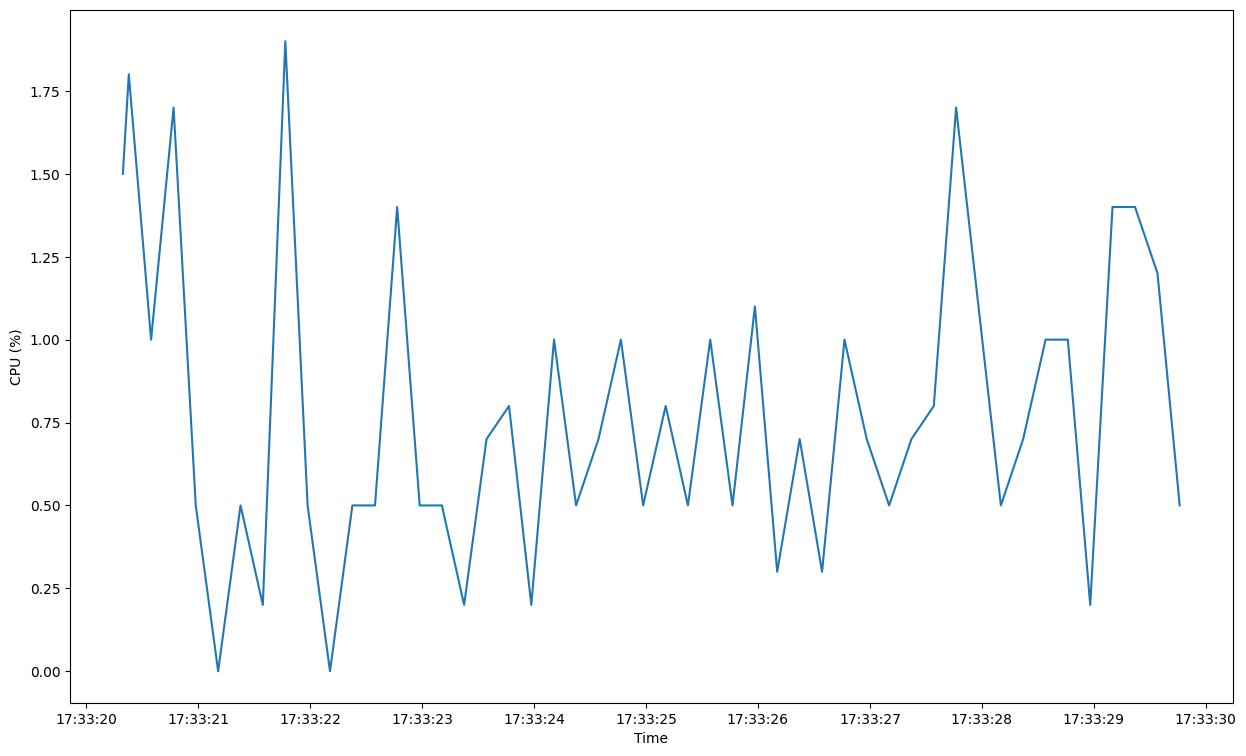

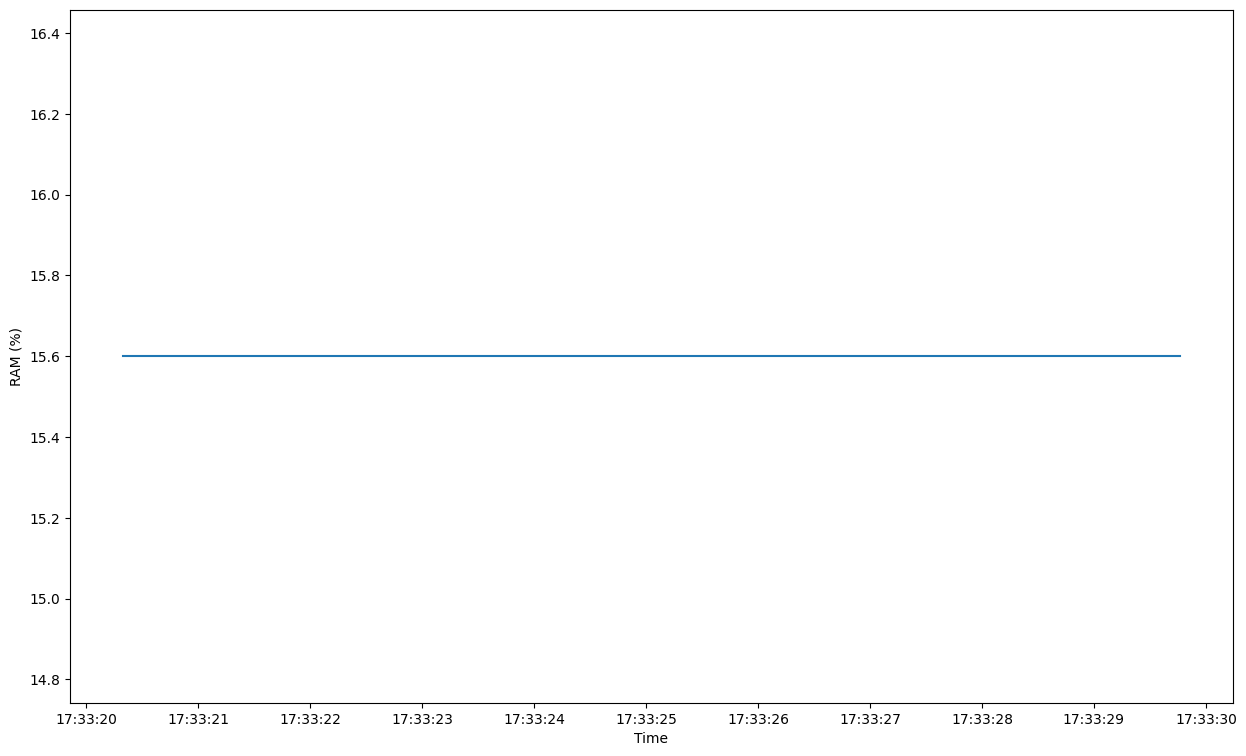

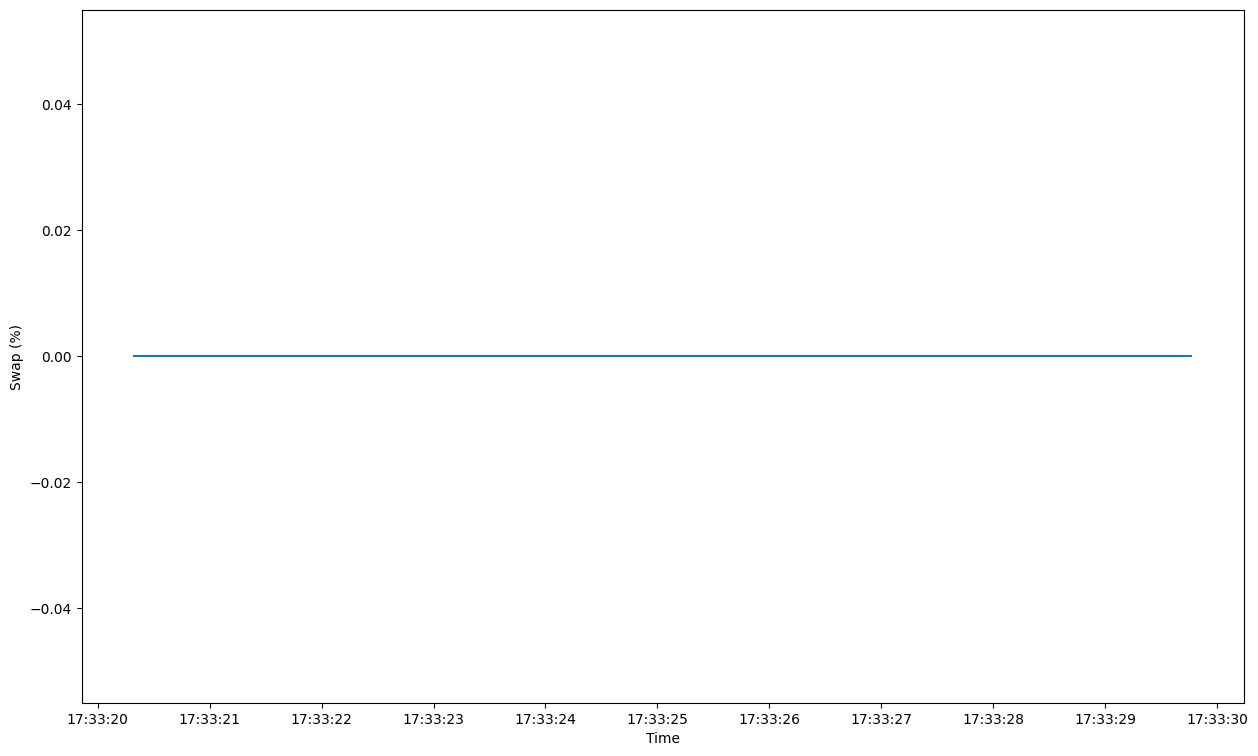

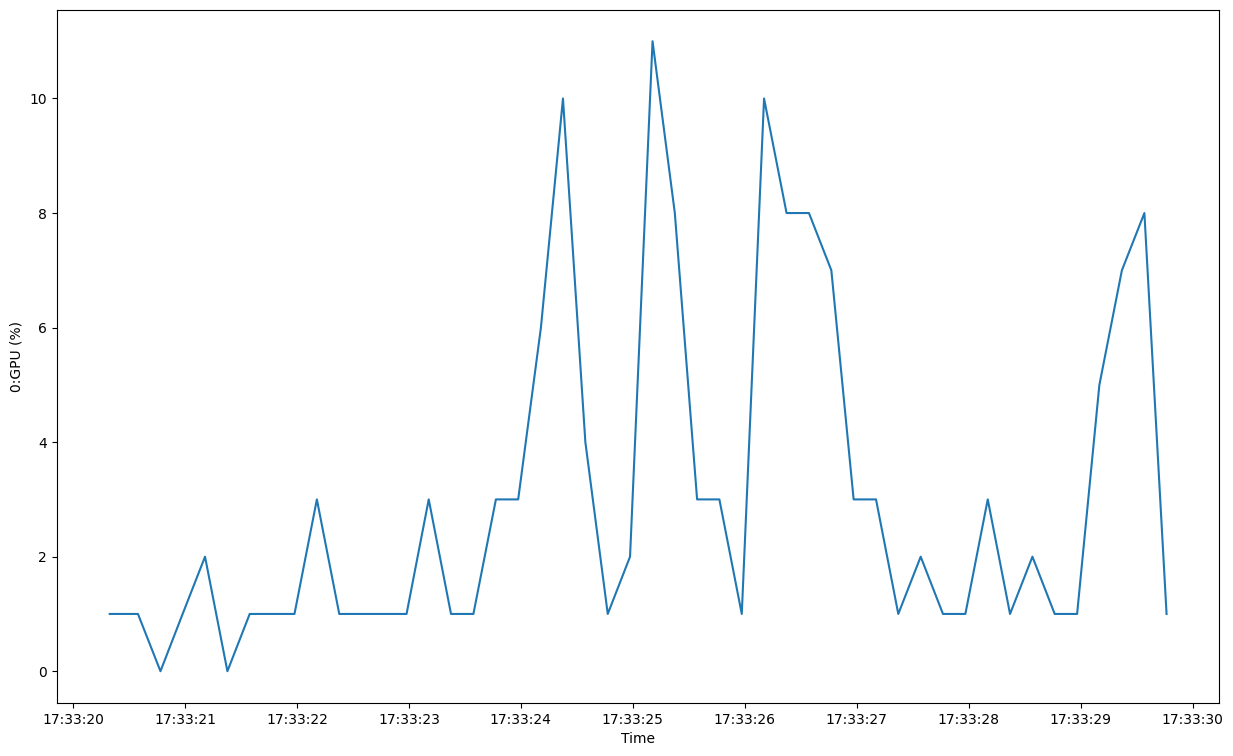

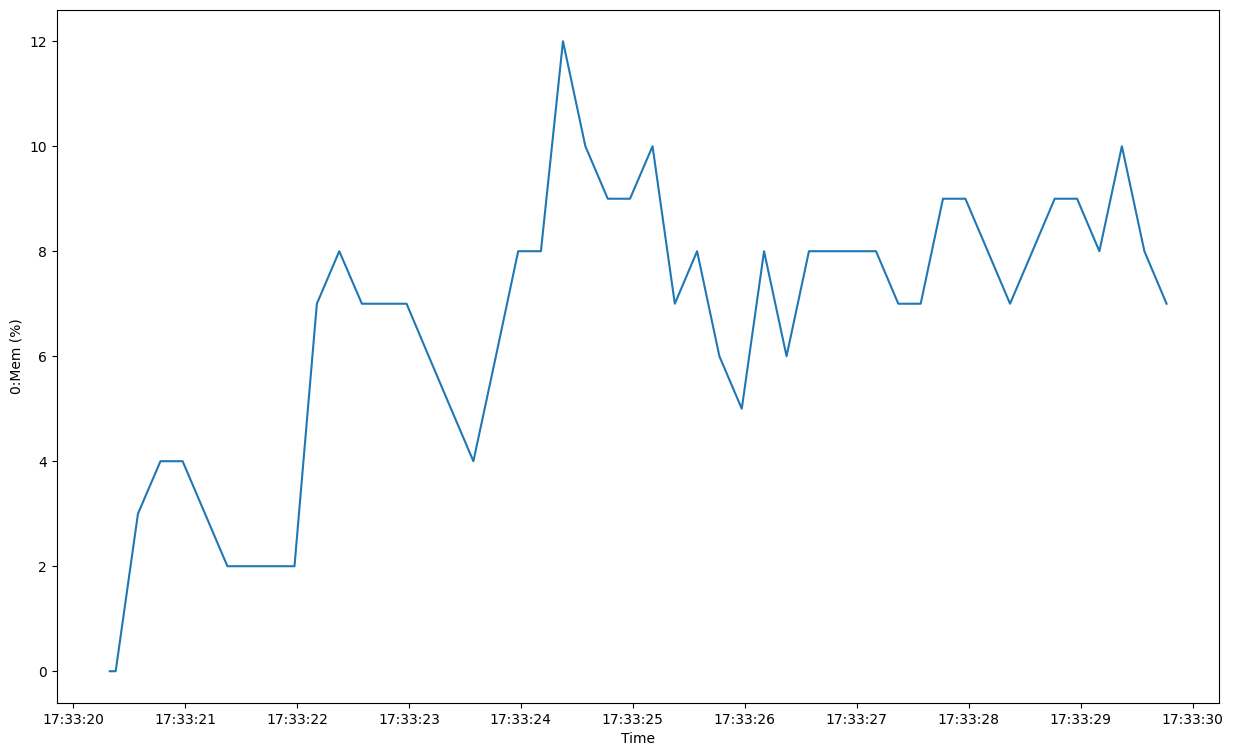

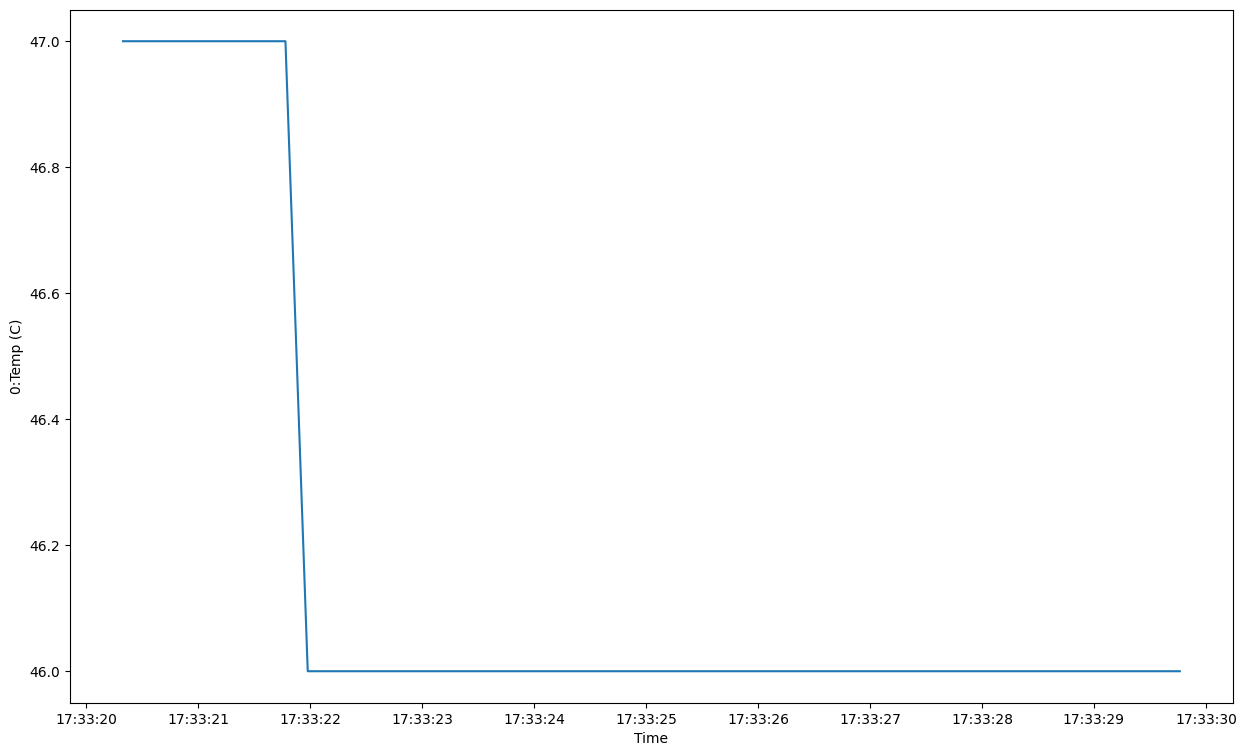

In [64]:
#Print using single prints for each item
for col in logger_df.columns:
    if 'time' in col.lower(): continue
    plt.figure(figsize=(15, 9))
    plt.plot(local_time, logger_df[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.show()